In [4]:
import warnings 
warnings.filterwarnings(action="ignore")

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('./EastWest .csv')

Balance = number of miles eligible for award travel 
QualMiles = number of miles qualifying for TopFlight status 
BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months 
BonusTrans = number of non-flight bonus transactions in the past 12 months FlightMiles = number of flight miles in the past 12 months 
FlightTrans = number of flight transactions in the past 12 months DaysSinceEnroll = number of days since enrolled in the frequent flyer program

In [9]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
df['Qual_miles']

0       0
1       0
2       0
3       0
4       0
       ..
3994    0
3995    0
3996    0
3997    0
3998    0
Name: Qual_miles, Length: 3999, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [11]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [13]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
df.drop(['ID#','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_trans_12','Days_since_enroll','Award?'], axis=1 , inplace = True )

In [15]:
df.rename({"Flight_miles_12mo":"mileage travelled"},axis=1,inplace=True)

In [16]:
df.head()

,Balance,mileage travelled
0,28143,0
1,19244,0
2,41354,0
3,14776,0
4,97752,2077


In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)

cluster_info = kmeans.fit(df)



In [43]:
cluster_info.cluster_centers_

array([[1.30188414e+05, 7.58395789e+02],
       [8.42320231e+05, 1.84588462e+03],
       [3.23538152e+05, 1.28922283e+03],
       [3.14270412e+04, 2.93792533e+02]])

In [44]:
cluster_info.labels_


array([3, 3, 3, ..., 3, 3, 3], shape=(3999,), dtype=int32)

In [45]:
cluster_info.inertia_

5660121874405.195

In [46]:
cluster_info.n_iter_

17

In [47]:
cluster_info.n_features_in_

2

Text(0, 0.5, 'Mileage travelled')

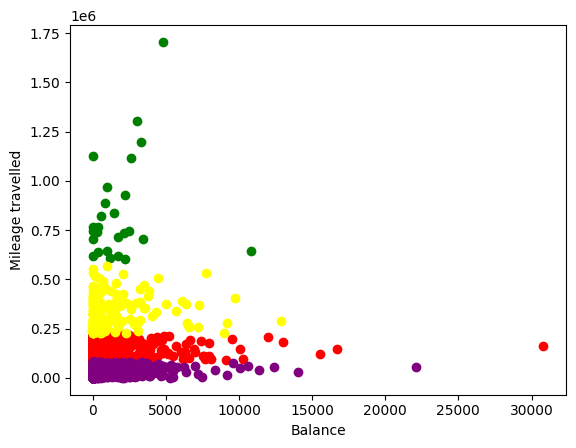

In [50]:
plt.scatter(df['mileage travelled'][cluster_info.labels_ == 0],df['Balance'][cluster_info.labels_ == 0], color = "red")
plt.scatter(df['mileage travelled'][cluster_info.labels_ == 1],df['Balance'][cluster_info.labels_ == 1], color = "green")
plt.scatter(df['mileage travelled'][cluster_info.labels_ == 2],df['Balance'][cluster_info.labels_ == 2], color = "yellow")
plt.scatter(df['mileage travelled'][cluster_info.labels_ == 3],df['Balance'][cluster_info.labels_ == 3], color = "purple")
plt.xlabel("Balance")
plt.ylabel("Mileage travelled")

In [40]:
wss = []
for k in range(2,8):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=k)

    cluster_info = kmeans.fit(df)

    wss.append(cluster_info.inertia_)

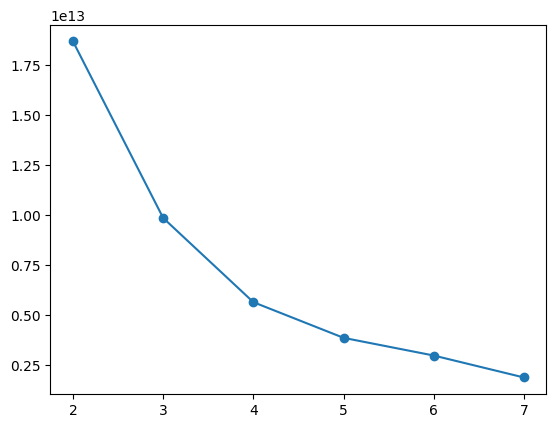

In [41]:
plt.scatter(range(2,8),wss)
plt.plot(range(2,8),wss)